<a href="https://colab.research.google.com/github/Ashong-Nartey/Data-Mining/blob/main/Data_Mining_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis in R

## Introduction
**Market Basket Analysis** is a popular data mining technique that is used to identify the patterns of data. As in "What is goes with what?"

It informs decisions and it is mostly used to increase business profit it is used to build recommender systems. 
A typical example is identifying the purchase patterns of products from a supermarket/mart. For online platforms such as Amazon, products are suggested based on previous purhases.  This is analyzed on the purchase patterns and present it to customers by suggesting products. It is also known as the association rule or the affinity analysis. The market basket analysis follows the basic principle "If customer A purchases item X, and item Y is likely to purchase item Z than purchasing item 1". In analysing health data, the case can be "what symptom goes with what diagnosis?" 

Next time, you see a movie suggested on Netflix, Amazon Prime, Big Basket etc, think of **MAEKET BASKET ANALYSIS** and **RECOMMENDER SYSTEMS** 


Let's jump into how to realize this beautiful technique using R

In [ ]:
Mydata<-read.csv("/content/MarketBasketData.csv", header = T, colClasses = "factor")

Let's view a snippet of the data

In [ ]:
str(Mydata)

'data.frame':	1000 obs. of  14 variables:
 $ Bag            : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 2 ...
 $ Blush          : Factor w/ 2 levels "No","Yes": 2 1 2 1 2 1 2 1 1 2 ...
 $ Nail.Polish    : Factor w/ 2 levels "No","Yes": 2 2 1 2 1 1 2 2 1 2 ...
 $ Brushes        : Factor w/ 2 levels "No","Yes": 2 1 1 2 1 1 2 2 1 2 ...
 $ Concealer      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 1 2 1 ...
 $ Eyebrow.Pencils: Factor w/ 2 levels "No","Yes": 1 1 2 1 1 1 1 1 1 1 ...
 $ Bronzer        : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ Lip.liner      : Factor w/ 2 levels "No","Yes": 2 2 2 1 2 1 2 1 1 1 ...
 $ Mascara        : Factor w/ 2 levels "No","Yes": 2 1 2 1 2 1 2 2 1 2 ...
 $ Eye.shadow     : Factor w/ 2 levels "No","Yes": 1 1 2 1 2 1 2 2 1 2 ...
 $ Foundation     : Factor w/ 2 levels "No","Yes": 1 2 2 2 1 1 2 1 2 1 ...
 $ Lip.Gloss      : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 1 2 2 1 1 ...
 $ Lipstick       : Factor w/ 2 levels "No","Yes": 1 1 2 1

First of all, let's see the packages available pre-installed in Google-Colab. Just to have a fair idea if the package we woruld use is available.

From the heading, of the output, there are 1000 obversations with 14 variables. The columns are loaded as factor variables. 

In [ ]:
str(allPackage <- installed.packages())
allPackage [, c(1,3:5)]

 chr [1:158, 1:16] "IRdisplay" "IRkernel" "pbdZMQ" "repr" "askpass" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:158] "IRdisplay" "IRkernel" "pbdZMQ" "repr" ...
  ..$ : chr [1:16] "Package" "LibPath" "Version" "Priority" ...


,Package,Version,Priority,Depends
IRdisplay,IRdisplay,1.1,NA,R (>= 3.0.1)
IRkernel,IRkernel,1.3,NA,R (>= 3.2.0)
pbdZMQ,pbdZMQ,0.3-7,NA,R (>= 3.5.0)
repr,repr,1.1.4,NA,R (>= 3.0.1)
askpass,askpass,1.1,NA,NA
assertthat,assertthat,0.2.1,NA,NA
backports,backports,1.4.1,NA,R (>= 3.0.0)
base64enc,base64enc,0.1-3,NA,R (>= 2.9.0)
bit,bit,4.0.4,NA,R (>= 2.9.2)
bit64,bit64,4.0.5,NA,"R (>= 3.0.1), bit (>= 4.0.0), utils, methods, stats"


Clearly the association rules package is not in the list packages. We therefore have to install it on the go.

In [ ]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



We go ahead to import the package and the assign the rules

In [ ]:
## import libraries 

library(arules)
rules<-apriori(Mydata)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[28 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [26 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(Mydata):
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.03s].
writing ... [68880 rule(s)] done [0.02s].
creating S4 object  ... done [0.02s].


From the output, the confidence is 0.8/80% for maximum number of items of 10. Observing the last but one line, it states that 68880 rules have been identified and that is a massive amount. Using such a huge number of rules will make the analysis difficult, therefore we reduce it to allow for easy analysis. We do this by setting the number of items purchased items from 2 to 10; maintain the confidence; and increase the support to 0.7 

In [ ]:
rules <- apriori(Mydata, parameter = list(minlen = 2, maxlen = 10, supp = 0.7, conf = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.7      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 700 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[28 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [15 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


This trims the number of rules from 68880 to 15 rules. we inpect the rules in our next code.

In [ ]:
inspect(rules)

     lhs                                   rhs                  support
[1]  {Nail.Polish=No}                   => {Brushes=No}         0.720  
[2]  {Brushes=No}                       => {Nail.Polish=No}     0.720  
[3]  {Lip.liner=No}                     => {Bag=No}             0.732  
[4]  {Lip.liner=No}                     => {Eyebrow.Pencils=No} 0.734  
[5]  {Brushes=No}                       => {Bag=No}             0.817  
[6]  {Bag=No}                           => {Brushes=No}         0.817  
[7]  {Brushes=No}                       => {Eyebrow.Pencils=No} 0.820  
[8]  {Eyebrow.Pencils=No}               => {Brushes=No}         0.820  
[9]  {Bag=No}                           => {Eyebrow.Pencils=No} 0.909  
[10] {Eyebrow.Pencils=No}               => {Bag=No}             0.909  
[11] {Bag=No, Lip.liner=No}             => {Eyebrow.Pencils=No} 0.703  
[12] {Eyebrow.Pencils=No, Lip.liner=No} => {Bag=No}             0.703  
[13] {Bag=No, Brushes=No}               => {Eyebrow.Pencils=No} 

We now need to identify the interesting rules. If the item is not purchased then the particular rule we are interested in, so we want to identify the rules with items tha are purchased.

### Finding rule 1

In [ ]:
rules<- apriori(Mydata, parameter = list(minlen = 2, maxlen = 10, supp = 0.01, conf = 0.7), appearance = list(rhs = c("Foundation=Yes"),lhs=c("Bag=Yes","Blush=Yes"),default = "lhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[3 item(s)] done [0.00s].
set transactions ...[28 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [28 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(Mydata, parameter = list(minlen = 2, maxlen = 10, supp = 0.01, :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.25s].
writing ... [32026 rule(s)] done [0.03s].
creating S4 object  ... done [0.02s].


In [ ]:
inspect(rules)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Finding Rule 2

In [ ]:
rules <- apriori(Mydata,parameter = list(minlen=2, maxlen=5,supp=.1, conf=.5),appearance=list(rhs=c("Foundation=Yes"),lhs=c("Bag=Yes", "Blush=Yes", "Nail.Polish=Yes", "Brushes=Yes", "Concealer=Yes", "Eyebrow.Pencils=Yes", "Bronzer=Yes", "Lip.liner=Yes", "Mascara=Yes", "Eye.shadow=Yes","Lip.Gloss=Yes", "Lipstick=Yes", "Eyeliner=Yes"),default="none"))
quality(rules)<-round(quality(rules),digits=3)
rules.sorted <- sort(rules, by="lift")

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      2
 maxlen target  ext
      5  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[14 item(s)] done [0.00s].
set transactions ...[14 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [12 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [22 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


### Removing redundant rules

We remove redundant rules that may have appeared in rule 1 and rule 2

In [ ]:
redundant <- is.redundant(rules, measure="confidence")
which(redundant)

[1] 11 12 13 14 15 16 17 18 19 20 21 22

In [ ]:
rules.pruned <- rules[!redundant]
rules.pruned <- sort(rules.pruned, by="lift")
inspect(rules.pruned)

     lhs                              rhs              support confidence
[1]  {Lip.Gloss=Yes, Lipstick=Yes} => {Foundation=Yes} 0.116   0.734     
[2]  {Lip.Gloss=Yes}               => {Foundation=Yes} 0.356   0.727     
[3]  {Eye.shadow=Yes}              => {Foundation=Yes} 0.211   0.554     
[4]  {Blush=Yes, Mascara=Yes}      => {Foundation=Yes} 0.101   0.549     
[5]  {Mascara=Yes}                 => {Foundation=Yes} 0.192   0.538     
[6]  {Blush=Yes}                   => {Foundation=Yes} 0.192   0.529     
[7]  {Concealer=Yes}               => {Foundation=Yes} 0.231   0.523     
[8]  {Eyeliner=Yes}                => {Foundation=Yes} 0.238   0.521     
[9]  {Lipstick=Yes}                => {Foundation=Yes} 0.167   0.519     
[10] {Nail.Polish=Yes}             => {Foundation=Yes} 0.143   0.511     
     coverage lift  count
[1]  0.158    1.370 116  
[2]  0.490    1.355 356  
[3]  0.381    1.033 211  
[4]  0.184    1.024 101  
[5]  0.357    1.003 192  
[6]  0.363    0.987 192  
[7] 

### Now you can see count and confidence is much higher.

### Visualization 

Let’s visualize the association rules.

In [ ]:
install.packages("arulesViz")
plot(rules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

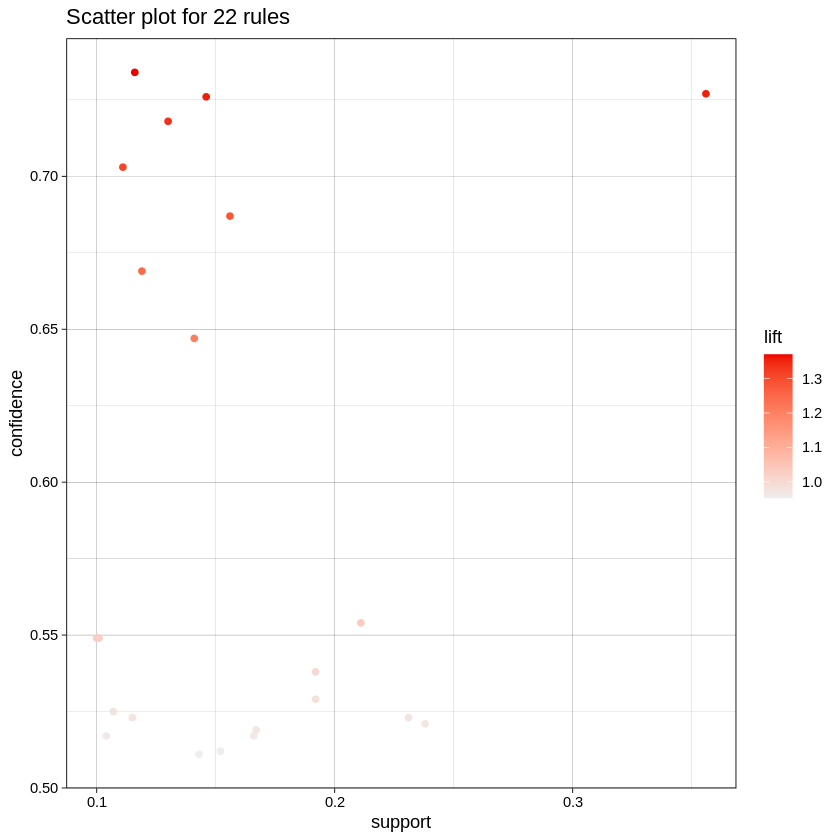

In [ ]:
library(arulesViz)
plot(rules)

Scatterplot with all rules with confidence and support.

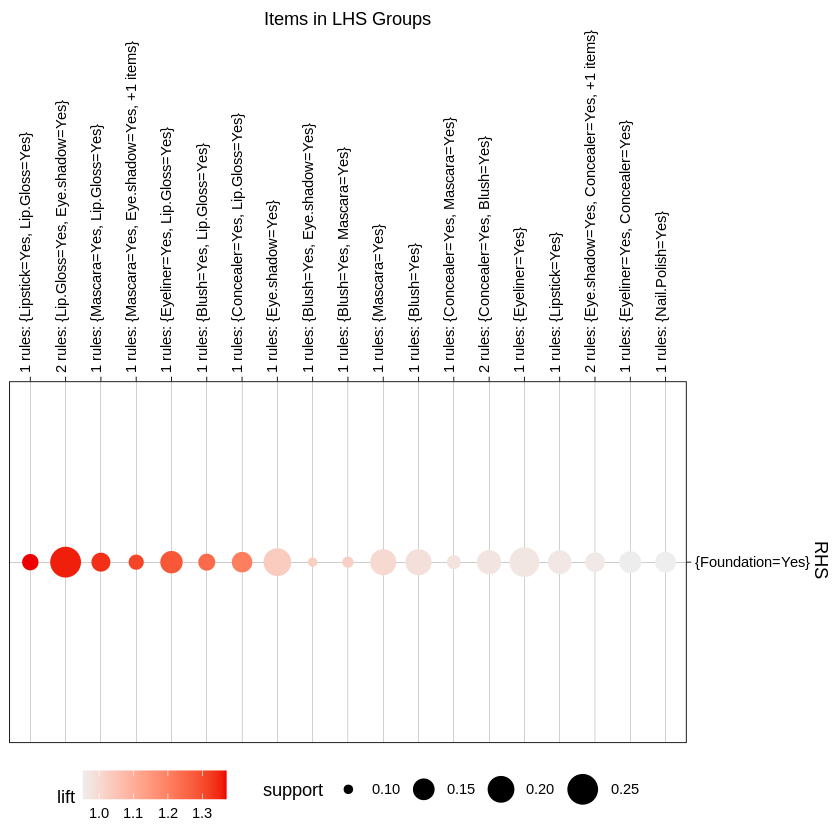

In [ ]:
plot(rules,method="grouped")

### Ballon plot listed with all the rules.

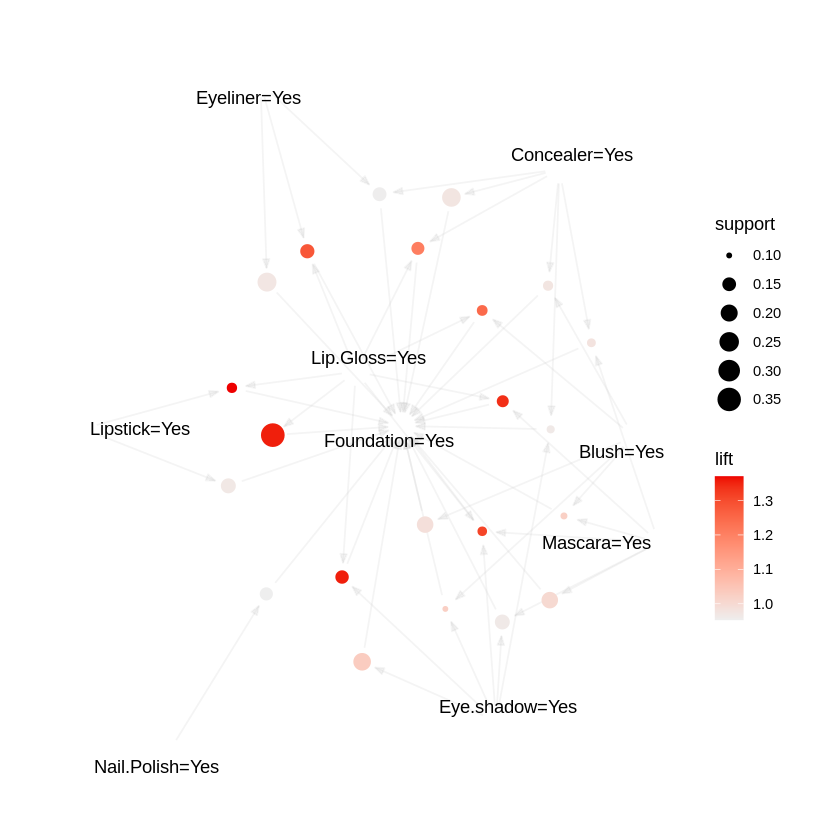

In [ ]:
plot(rules,method="graph")

From the Network diagram above with support and confidence. Whenever purchasing lip gloss consumers are purchasing foundation also.